In [1]:
import json
import os
from os import listdir
from os.path import isfile, join
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib
import tabulate
import numpy as np
import math

import re
from itertools import cycle, islice


In [2]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [7]:
data_dir = 'priv_data'
out_dir = 'out'

#####
appname = 'LUBM_schemex'
data_size_dir = 'LUBM'
#####
appname = 'BSBM-undirected-attribute-test-1'
data_size_dir = 'BSBM'
#####
#appname = 'cumulated_citation-network-v11_schemex-test-1'
#data_size_dir = 'citation-networkv11'
#####
#appname = 'dyldo_y2019_full_schemex-test-1'
#data_size_dir = 'DyLDO-ext'
# #####
#appname = 'dyldo_y2019_core_schemex_clean'
#data_size_dir = 'DyLDO-core'
#appname = 'dyldo_y2019_core_attribute-test-1'
#data_size_dir = 'DyLDO-core'

suffix = ''

In [8]:
curr_dir = join(data_dir, data_size_dir)
onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".txt")]



def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

onlyfiles.sort(key=natural_keys)
#onlyfiles = sorted(onlyfiles)

print(onlyfiles)


    

edgecounts = {}
tmp = 0
for filename in onlyfiles:
    # first line: number of types in dataset (not unique)
    # second line: number of edges in dataset (not unique)
    f = open(join(curr_dir,filename), 'r')
    content = f.read().split('\n')
    edges = int(content[1])
    if 'iteration' in filename:
        iteration = filename.replace('iteration', '')
        iteration = iteration.replace('-', '')
        iteration = iteration.replace('.txt', '')
        iteration = iteration.replace('.gz', '')
        iteration = iteration.replace('.nq', '')
        iteration = iteration.replace('.nt', '')
       
        
        edgecounts[int(iteration)] = edges
    else:
        edgecounts[tmp] = edges
        tmp = tmp + 1


#edgecounts

['iteration-0.txt', 'iteration-1.txt', 'iteration-2.txt', 'iteration-3.txt', 'iteration-4.txt', 'iteration-5.txt', 'iteration-6.txt', 'iteration-7.txt', 'iteration-8.txt', 'iteration-9.txt', 'iteration-10.txt', 'iteration-11.txt', 'iteration-12.txt', 'iteration-13.txt', 'iteration-14.txt', 'iteration-15.txt', 'iteration-16.txt', 'iteration-17.txt', 'iteration-18.txt', 'iteration-19.txt', 'iteration-20.txt', 'iteration-21.txt', 'iteration-22.txt', 'iteration-23.txt', 'iteration-24.txt', 'iteration-25.txt', 'iteration-26.txt', 'iteration-27.txt', 'iteration-28.txt', 'iteration-29.txt', 'iteration-30.txt', 'iteration-31.txt', 'iteration-32.txt', 'iteration-33.txt', 'iteration-34.txt', 'iteration-35.txt', 'iteration-36.txt', 'iteration-37.txt', 'iteration-38.txt', 'iteration-39.txt', 'iteration-40.txt']


MAX: 0    12726519
dtype: int64
MIN: 0    67622
dtype: int64
           0
0      67622
40     67622
1     649327
39    649327
2    1288794
38   1288794
3    1936770
37   1936770
4    2567969
36   2567969
35   3198518
5    3198518
6    3829244
34   3829244
33   4459938
7    4459938
32   5090583
8    5090583
9    5721236
31   5721236
30   6351905
10   6351905
11   7019120
29   7019120
12   7649993
28   7649993
27   8281004
13   8281004
14   8912007
26   8912007
15   9542609
25   9542609
24  10200532
16  10200532
17  10832314
23  10832314
18  11463566
22  11463566
21  12095155
19  12095155
20  12726519


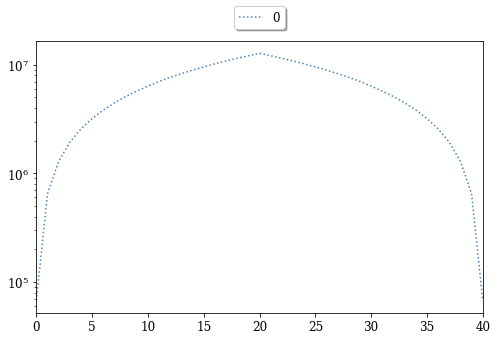

In [9]:
edgeframe = pd.DataFrame.from_dict(edgecounts, orient='index')
edgeframe = pd.DataFrame.sort_index(edgeframe)
#print(edgeframe)
ax = edgeframe.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'],
             color=['steelblue', 'steelblue', 'steelblue', 'steelblue','indianred','indianred','indianred','indianred']) # 'gray',
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
#plt.xticks(np.arange(0, 50, 5.0))
print("MAX: " + str(edgeframe.max()))
print("MIN: " + str(edgeframe.min()))

print(edgeframe.sort_values(0))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)

In [10]:
frames = [None, None]

with open(os.path.join(data_dir, appname + '-changes.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()

    del df['NewlyObservedSchema (SE_new)']
    del df['DeletedSchemaStructures (SE_del)']

    del df['TotalNumberOfNewInstances'] 
    del df['InstanceAddedWithKnownSchema (PE_add)']
    del df['InstancesDeleted (PE_del)']
    del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
    del df['PayloadEntriesAdded'] 
    del df['PayloadEntriesRemoved'] 
    del df['InstanceToSchemaLinksAdded'] 
    del df['InstanceToSchemaLinksRemoved'] 
    #tmp
    #del df['InstanceNotChanged (PE_mod)']
    del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')

    print(df.columns)
    df.columns = ['SchemEX:MOD', 'SchemEX:Unchanged', 'SchemEX:ADD', 'SchemEX:DEL']    #'Modified pe(v)'
    df = df[['SchemEX:ADD', 'SchemEX:DEL', 'SchemEX:MOD','SchemEX:Unchanged']] #'Modified pe(v)'
    
    frames[0] = df
    

    


print(appname)
df

Index(['ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)',
       'TotalNumberOfSchemaElementsWritten',
       'TotalNumberOfSchemaElementsDeleted'],
      dtype='object')
BSBM-undirected-attribute-test-1


,SchemEX:ADD,SchemEX:DEL,SchemEX:MOD,SchemEX:Unchanged
Iteration,,,,
0,58,0,0,0
1,9,3,144,7203
2,14,4,884,67172
3,8,5,1541,131375
4,11,7,273,200019
5,9,8,212,263237
6,8,6,200,326375
7,7,7,196,389520
8,18,5,225,452633


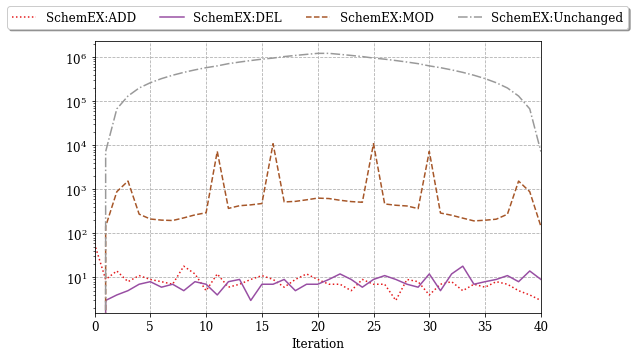

In [11]:
n = 4
colors = pl.cm.Set1(np.linspace(0,1,n))

ax = df.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'], color=colors)
# color=['steelblue', 'steelblue', 'steelblue', 'steelblue','indianred','indianred','indianred','indianred']) # 'gray',
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
plt.xticks(np.arange(0, iterations, 5.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-changes.png')

In [12]:
frames = [None, None]

with open(os.path.join(data_dir, appname + '-performance.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()


    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')

    del df['Load Graph']
    del df['Parse Graph']
    del df['Partition Graph']
    del df['Schema Computation']
    del df['Updates']
    df.columns = ['SchemEX:Incr', 'SchemEX:Batch']

    frames[0] = df





In [13]:
convert = lambda x: x /1000 / 60
df = df.applymap(convert)    

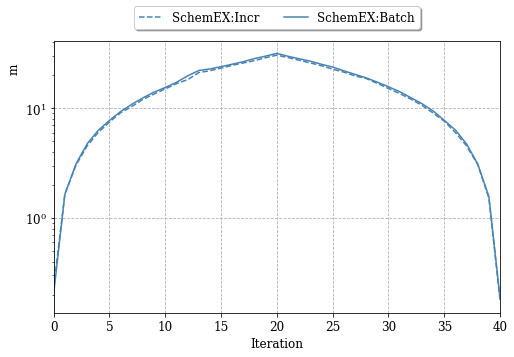

In [14]:
#df = df[['Incremental (total)', 'Batch (total)','Schema Computation', 'SG Updates (total)', 'SG Add', 'SG Delete', 'SG Read','Secondary Index Updates']]

#model_dtype = pd.api.types.CategoricalDtype(categories=['Incremental (total)', 'Batch (total)',
#                                                     'Schema Computation', 'SG Updates (total)', 
#                                                    'SG Add', 'SG Delete', 'SG Read',
#                                                    'Secondary Index Updates'], ordered=True)
#royalblue
#, 'dimgray', 'darkslateblue', 'darkmagenta', 'indianred', 'forestgreen','lightsteelblue'
ax = df.plot(logy=True, style = ['--','-','--','-'], color=['steelblue', 'steelblue','indianred', 'indianred'])
ax.set_xlabel("Iteration")
ax.set_ylabel("m")
ax.yaxis.set_label_coords(-0.075,.9)
plt.xticks(np.arange(0, iterations, 5.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)
plt.grid(True)

plt.savefig(out_dir + '/' + appname + '-performance.png')

In [15]:
with open(os.path.join(data_dir, appname + '-update-time-and-space.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()

    tmpFrame = pd.DataFrame()
    tmpFrame['A'] = df['SE links']
    tmpFrame['B'] = df['Imprint links']

    #df['Secondary Index Size'] = tmpFrame.sum(axis=1)

    tmpFrame = pd.DataFrame()
    tmpFrame['A'] = df['Schema Elements (SE)']
    tmpFrame['B'] = df['Schema Relations (SR)']

    #df['Summary Graph Size'] = tmpFrame.sum(axis=1)

    del df['SecondaryIndex Read time (ms)']
    del df['SecondaryIndex Write time (ms)']
    del df['SecondaryIndex Del time (ms)']
    #--->
    del df['SecondaryIndex Total time (ms)']
    #<----
    del df['SE links']
    #del df['Imprint links']
    del df['Checksum links']
    #del df['Schema Elements (SE)']
    #del df['Schema Relations (SR)']

    del df['SG Read time (ms)']
    del df['SG Write time (ms)']
    del df['SG Del time (ms)']

    del df['Sec. Index Size (bytes)']
    del df['Index Size (bytes)']
    del df['Graph Size (bytes)']
    #print(df)
    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')
    #print(df.columns)
    df.columns = ['|V_g|', '|V_sg|', '|E_sg|']
    
    frames[0] = df
    
df

,|V_g|,|V_sg|,|E_sg|
Iteration,,,
0,7347,58,685
1,68056,64,765
2,132916,74,915
3,200291,77,964
4,263447,81,1022
5,326574,82,1040
6,389712,84,1083
7,452855,84,1084
8,515989,97,1291


In [16]:
dfnew = df.join(edgeframe,how='outer')
dfnew

,|V_g|,|V_sg|,|E_sg|,0
Iteration,,,,
0,7347,58,685,67622
1,68056,64,765,649327
2,132916,74,915,1288794
3,200291,77,964,1936770
4,263447,81,1022,2567969
5,326574,82,1040,3198518
6,389712,84,1083,3829244
7,452855,84,1084,4459938
8,515989,97,1291,5090583


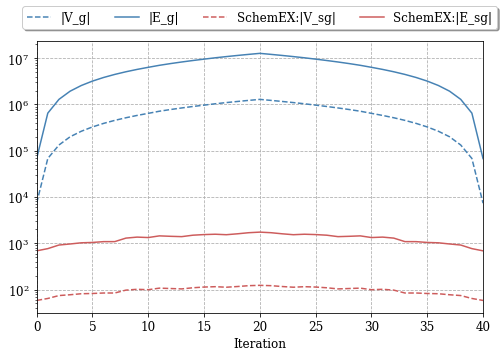

In [17]:
dfnew.columns = ['|V_g|', 'SchemEX:|V_sg|', 'SchemEX:|E_sg|', '|E_g|'] 
dfnew = dfnew[['|V_g|', '|E_g|', 'SchemEX:|V_sg|', 'SchemEX:|E_sg|']]


ax = dfnew.plot(logy=True, style = ['--','-','--','-'],
             color=['steelblue', 'steelblue','indianred', 'indianred'])#,yticks=([math.exp(w) for w in np.arange(1, 10, 2)]))
#ax.set_ylim([2500, 80000])
#plt.yticks(np.arange(0, iterations, 5.0))
#plt.
plt.xticks(np.arange(0, iterations, 5.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)
plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-sizes.png')

#model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'W-Property Clique',
#                                                     'SemSets', 'SchemEX', 'TermPicker', 'SchemEX+U+oI',
#                                                     'SchemEX+U+pI'], ordered=True)

# model_dtype = pd.api.types.CategoricalDtype(categories=['Model-A', 'Model-B',
#                                                     'Model-C', 'Model-D', 'Model-E', 'Model-F',
#                                                     'Model-G'], ordered=True)

#config_dtype = pd.api.types.CategoricalDtype(categories=['SQ - 1k', 'SQ - 100k', 'SQ - 200k', 'CQ - 1k', 'CQ - 100k', 'SchemEX+U+oI',
 #                                                    'CQ - 200k'], ordered=True)